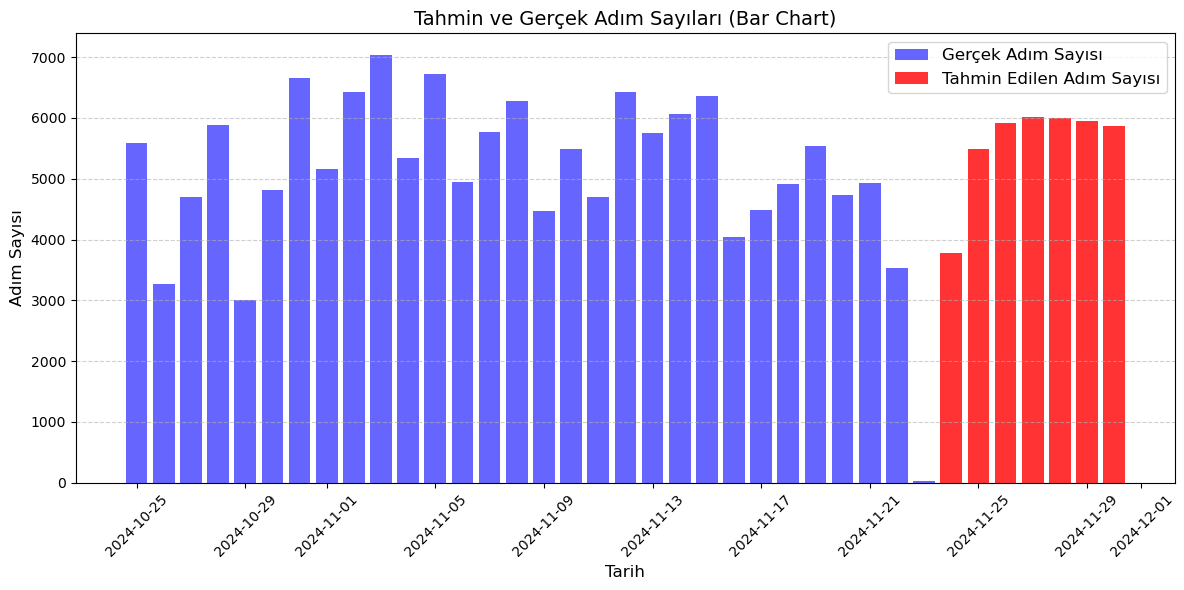

In [34]:
# Bar Chart ile Tahmin ve Gerçek Adım Sayıları
plt.figure(figsize=(12, 6))

# Gerçek adım sayısı
plt.bar(df['date'][-30:], df['steps'][-30:], color='blue', alpha=0.6, label='Gerçek Adım Sayısı')

# Tahmin edilen adım sayısı
plt.bar(future_steps['date'], future_steps['predicted_steps'], color='red', alpha=0.8, label='Tahmin Edilen Adım Sayısı')

# Grafik ayarları
plt.title("Tahmin ve Gerçek Adım Sayıları (Bar Chart)", fontsize=14)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Adım Sayısı", fontsize=12)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


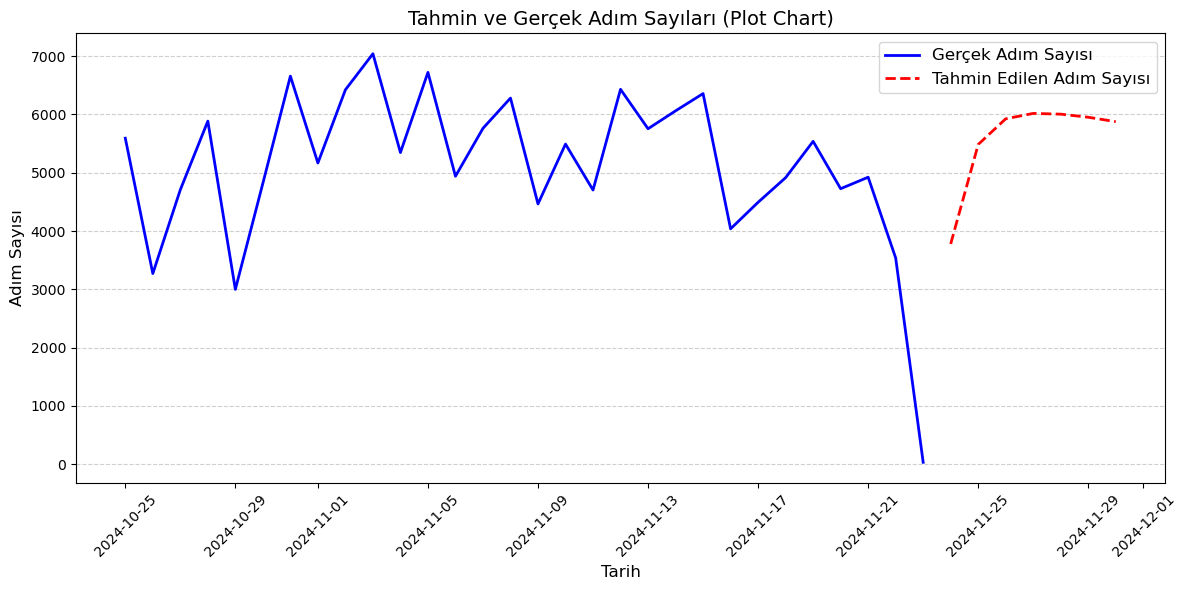

In [78]:
# Plot Chart ile Tahmin ve Gerçek Adım Sayıları
plt.figure(figsize=(12, 6))

# Gerçek adım sayısı
plt.plot(df['date'][-30:], df['steps'][-30:], label='Gerçek Adım Sayısı', color='blue', linewidth=2)

# Tahmin edilen adım sayısı
plt.plot(future_steps['date'], future_steps['predicted_steps'], label='Tahmin Edilen Adım Sayısı', color='red', linestyle='--', linewidth=2)

# Grafik ayarları
plt.title("Tahmin ve Gerçek Adım Sayıları (Plot Chart)", fontsize=14)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Adım Sayısı", fontsize=12)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


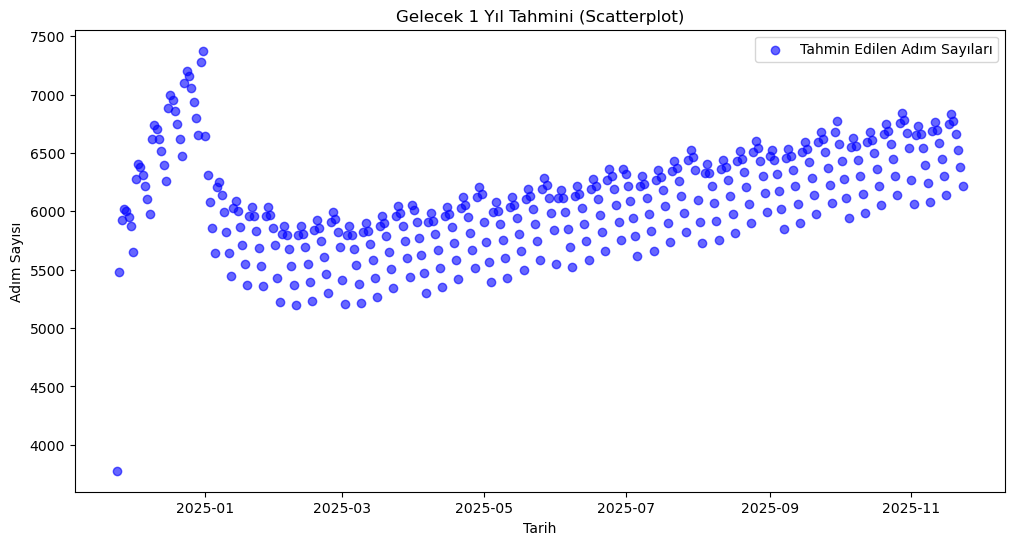

In [12]:
# %% Scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(future_year_steps['date'], future_year_steps['predicted_steps'], color='blue', alpha=0.6, label='Tahmin Edilen Adım Sayıları')
plt.title("Gelecek 1 Yıl Tahmini (Scatterplot)")
plt.xlabel("Tarih")
plt.ylabel("Adım Sayısı")
plt.legend()
plt.show()


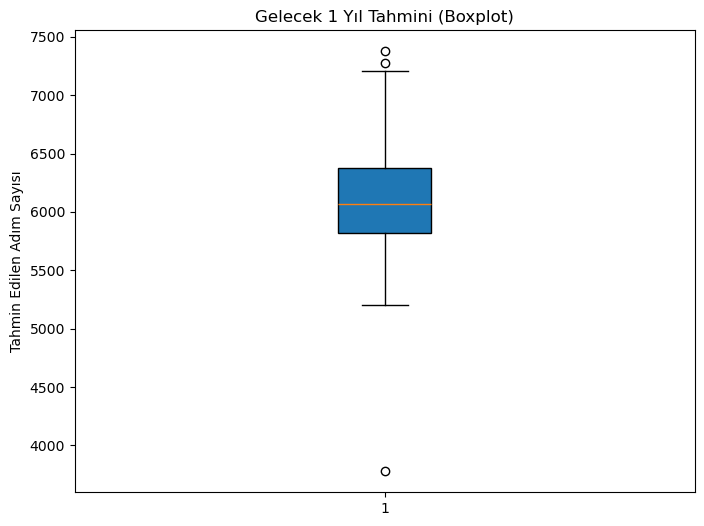

In [14]:
# %% Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(future_year_steps['predicted_steps'], vert=True, patch_artist=True)
plt.title("Gelecek 1 Yıl Tahmini (Boxplot)")
plt.ylabel("Tahmin Edilen Adım Sayısı")
plt.show()


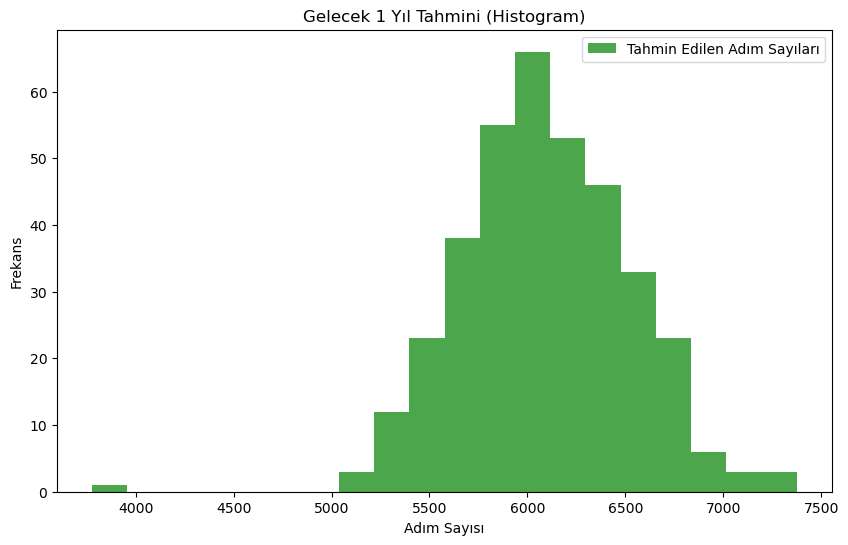

In [16]:
# %% Histogram
plt.figure(figsize=(10, 6))
plt.hist(future_year_steps['predicted_steps'], bins=20, alpha=0.7, color='green', label='Tahmin Edilen Adım Sayıları')
plt.title("Gelecek 1 Yıl Tahmini (Histogram)")
plt.xlabel("Adım Sayısı")
plt.ylabel("Frekans")
plt.legend()
plt.show()


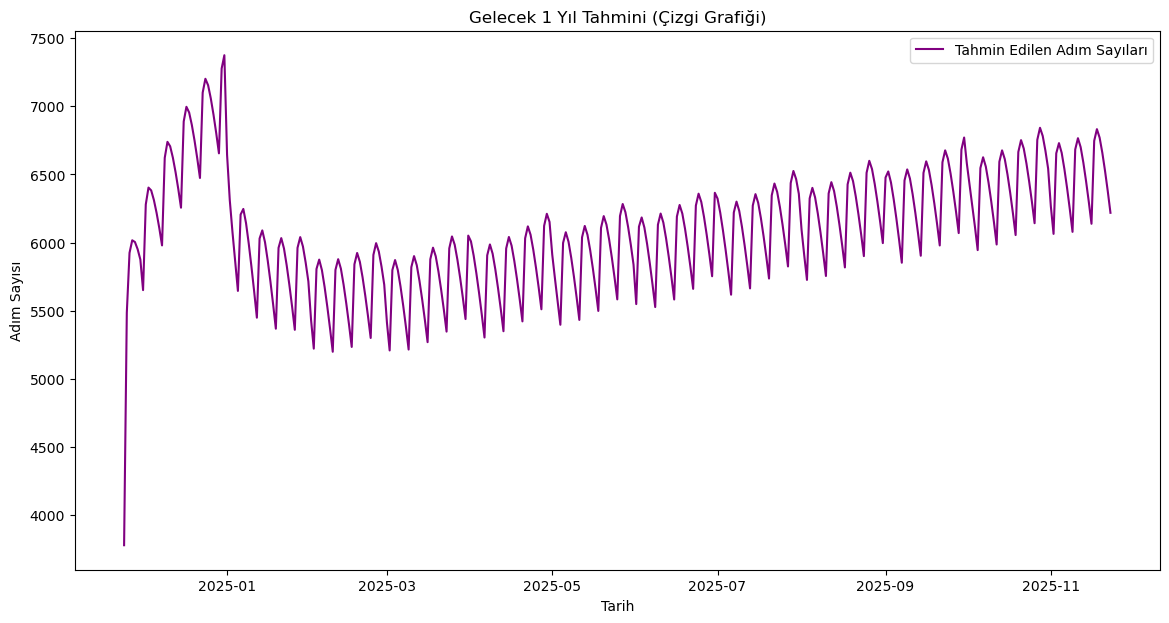

In [18]:
# %% Line Chart
plt.figure(figsize=(14, 7))
plt.plot(future_year_steps['date'], future_year_steps['predicted_steps'], color='purple', label='Tahmin Edilen Adım Sayıları')
plt.title("Gelecek 1 Yıl Tahmini (Çizgi Grafiği)")
plt.xlabel("Tarih")
plt.ylabel("Adım Sayısı")
plt.legend()
plt.show()


In [52]:
# Tahmin ve gerçek verileri kontrol et
print("Gerçek Veri (Son 10 Gün):")
print(df_real_trimmed.tail(10))
print("Tahmin Veri (Son 10 Gün):")
print(df_pred.tail(10))


Gerçek Veri (Son 10 Gün):
        date   steps  day_of_week  month  year  day_of_year  \
0 2024-09-17  9655.0            1      9  2024          261   
1 2024-09-18  6394.0            2      9  2024          262   
2 2024-09-19  9846.0            3      9  2024          263   
3 2024-09-20  6317.0            4      9  2024          264   
4 2024-09-21  4609.0            5      9  2024          265   
5 2024-09-22  5326.0            6      9  2024          266   
6 2024-09-23  6686.0            0      9  2024          267   

   previous_day_steps  rolling_mean_7  rolling_mean_30  
0              8462.0     8845.428571      7581.800000  
1              9655.0     8942.142857      7730.633333  
2              6394.0     8739.000000      7773.133333  
3              9846.0     9187.285714      7900.766667  
4              6317.0     9174.428571      7925.633333  
5              4609.0     8508.142857      7871.333333  
6              5326.0     7229.857143      7874.366667  
Tahmin Veri (

In [54]:
# Fark hesaplama
df_pred['difference'] = df_pred['predicted_steps'] - df_real_trimmed['steps']

# Negatif farkları düzeltmek için (eğer gerekliyse):
df_pred['difference'] = df_pred['difference'].clip(lower=0)  # Minimum 0 değerini alır


In [56]:
# Gün ve ay bilgisi ekleme
df_pred['day'] = df_pred['date'].dt.day
df_pred['month'] = df_pred['date'].dt.month

# Pivot tablo oluşturma
heatmap_data = df_pred.pivot(index="month", columns="day", values="difference")

# Eksik değerleri doldur
heatmap_data.fillna(0, inplace=True)


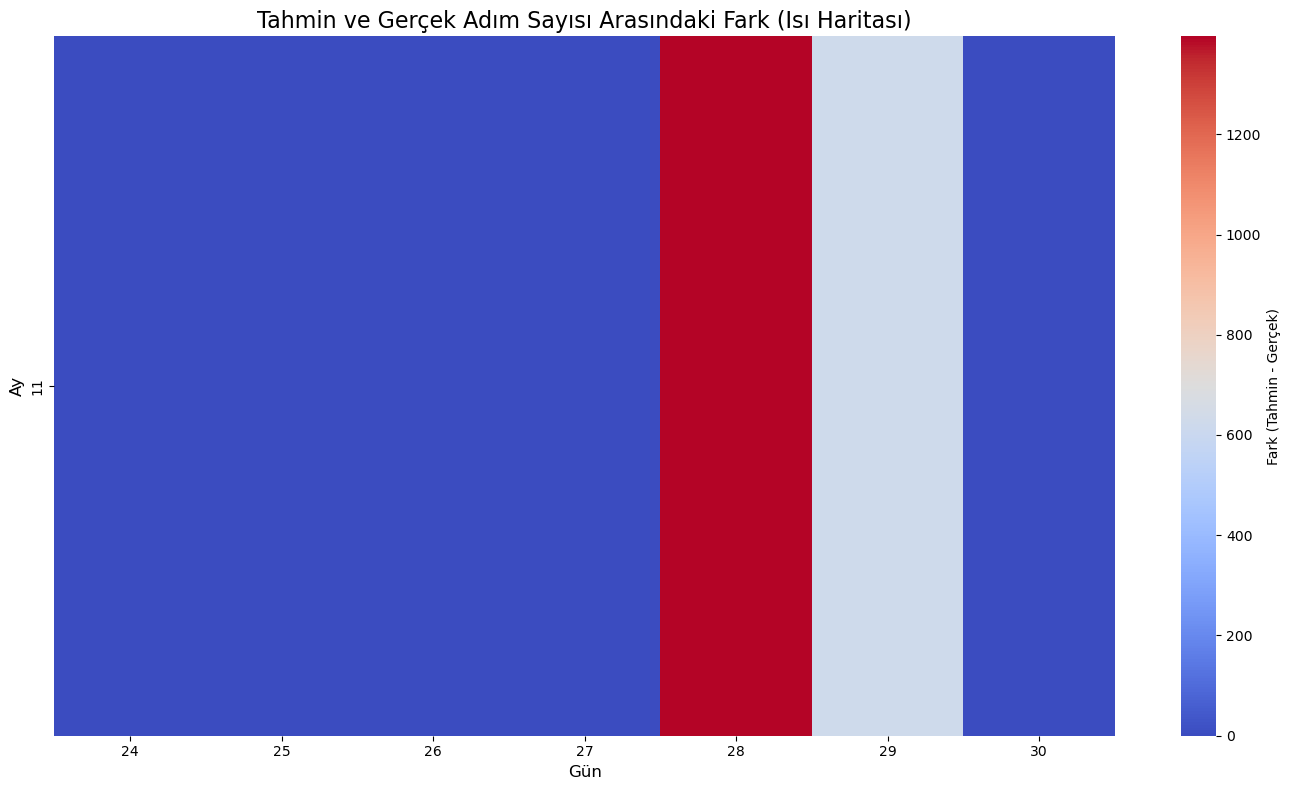

In [58]:
# Heatmap oluşturma
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=False,  # Sayılar olmadan sadece renk
    cmap="coolwarm",
    cbar_kws={'label': 'Fark (Tahmin - Gerçek)'}
)
plt.title("Tahmin ve Gerçek Adım Sayısı Arasındaki Fark (Isı Haritası)", fontsize=16)
plt.xlabel("Gün", fontsize=12)
plt.ylabel("Ay", fontsize=12)
plt.tight_layout()
plt.show()
